In [1]:
import random

#### Classe para a particula

In [2]:
class Particle:
    def __init__(self, num_dimensions, bounds):
      self.num_dimensions = num_dimensions
      
      self.position = []
      self.velocity = []

      for i in range(self.num_dimensions):
        pos = random.uniform(bounds[i][0], bounds[i][1])
        vel = random.uniform(bounds[i][0], bounds[i][1])

        self.position.append(pos)
        self.velocity.append(vel)

#### PSO Utils

In [3]:
class Utils:
  @staticmethod
  def euclidean_distance(p1, p2):
    ans = 0

    for i in range(len(p1.position)):
      ans += (p1.position[i] -p2.position[i]) ** 2

    return ans

  @staticmethod
  def find_closest(p, swarm):
      min_dist = None
      closest = None

      for particle in swarm:
        if particle == p:
          continue

        dist = Utils.euclidean_distance(p, particle)

        if closest is None or dist < min_dist:
          min_dist = dist
          closest = particle

      return closest

#### PSO Operators

In [4]:
class Operators:
  @staticmethod
  def adjust_velocity(swarm):
    population_adjusted = []

    for particle in swarm:
      closest = Utils.find_closest(particle, swarm)
      particle.velocity = closest.velocity

      population_adjusted.append(particle)

    return population_adjusted

  @staticmethod
  def craziness(swarm, bounds, num_dimensions):
    population_crazy = []
    CRAZINESS_PROBABILITY = 0.01

    for particle in swarm:
      prob = random.uniform(0, 1)
      if prob < CRAZINESS_PROBABILITY:
        new_velocity = []
        for i in range(num_dimensions):
          vel = random.uniform(bounds[i][0],bounds[i][1])
          new_velocity.append(vel)
        
        particle.velocity = new_velocity

      population_crazy.append(particle)

    return population_crazy

  def update_position(swarm, num_dimensions):
    population_updated = []

    for particle in swarm:
      new_position = []

      for i in range(num_dimensions):
        pos = particle.position[i] + particle.velocity[i]
        new_position.append(pos)

      particle.position = new_position
      population_updated.append(particle)

    return population_updated

#### Main

Starting
Starting iterations
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49


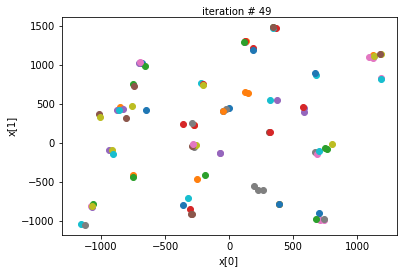

In [5]:
from plot_utils import PlotUtils

print("Starting")

num_iterations = 50
num_particles = 100
num_dimensions = 2

bounds = [
    [-30, 30], # dimensão X
    [-30, 30], # dimensão Y
]

swarm = []

for _ in range(num_particles):
  swarm.append(Particle(num_dimensions, bounds))

print("Starting iterations")

i = 0
while i < num_iterations:
  print(f"Iteration {i}")
  
  swarm = Operators.adjust_velocity(swarm)
  swarm = Operators.craziness(swarm, bounds, num_dimensions)
  swarm = Operators.update_position(swarm, num_dimensions)

  for particle in swarm:
    PlotUtils.plot_particle(particle)
  PlotUtils.plot_iteration(i)

  i += 1

PlotUtils.save()
PlotUtils.play()